<a href="https://colab.research.google.com/github/shi-star/Neural_Network_Telco_churn/blob/main/Telco_Churn_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

## Business Problem<br>
Customer churn occurs when customers cease doing business with a firm. Retaining 
existing customers is more cost efficient than trying to attract new customers. With 
intense competition in the telecommunications industry, it would thus be 
advantageous for a firm to be able to predict if certain customers are likely to cease 
their service since the firm may attempt to persuade them to stay through various 
means such as attractive discounts or packages.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Imported the libraries. 

In [ ]:
churn = pd.read_csv(path)

### Loaded the data 

In [ ]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### A glimpse of the data

In [ ]:
churn.drop(columns=['customerID'], axis=1, inplace=True)

### Drop the ID column as it is not useful as does not provide any info.

In [ ]:
churn.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
churn.shape

(7043, 20)

### Now checked the shape of the data 

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Info of the data: 
* float column = 1
* int column = 2
* object = 17

In [ ]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

That's great!!! There's no null values in the data.

In [ ]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We will treat senior citizen column as the categorical column as it has only two values. 0 and 1 , which means it is a categorical variable already in dummy format.

In [ ]:
churn.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Here we can see the unique values in each categorical columns with their frequency in the column. <br>
#### we can see 'Total Charges' are of int type however wrongly classified as object. so we will convert it to the numerical varible.

In [ ]:
pd.crosstab(churn['Churn'],columns='percent', normalize=True)

col_0,percent
Churn,
No,0.73463
Yes,0.26537


It seems the imbalanced data here. however before applying the model , we will increase the weightage of the yes category. 

In [ ]:
churn['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
6444.05     1
1697.7      1
961.4       1
1618.2      1
2471.25     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
churn['TotalCharges']= pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Now we have successfully changed the data type of the 'Total Charges' As numerical type. <br>
Here we can see the min is 18 and the max is 8684. Which indicates high variation in the column. We will further analyse it and treat it. 

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that Total charges column has 11 missing values. However we will treat them after the univariate analysis.

In [ ]:
churn['TotalCharges'].mean()

2283.3004408418697

In [ ]:
churn['TotalCharges'].median()

1397.475

In [ ]:
churn['TotalCharges'].fillna((churn['TotalCharges'].median()), inplace=True)

In [ ]:
churn['TotalCharges'].isnull().sum()

0

Now we have treated the missing values , by replacing the values with the median. As the values are only 11 in number.

# Let's do the univariate analysis 

In [ ]:
list_obj = churn.select_dtypes(include='object').columns.tolist()


In [ ]:
list_obj.append('SeniorCitizen')

In [ ]:
list_obj

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

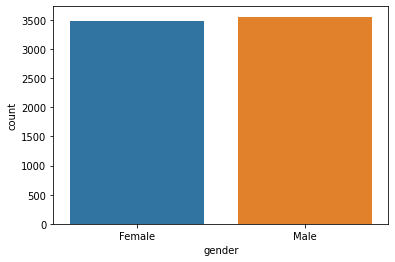

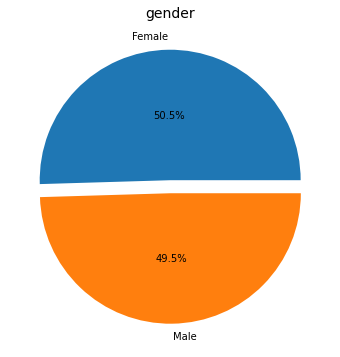

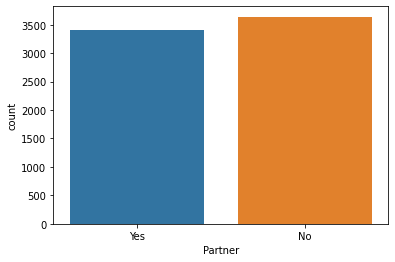

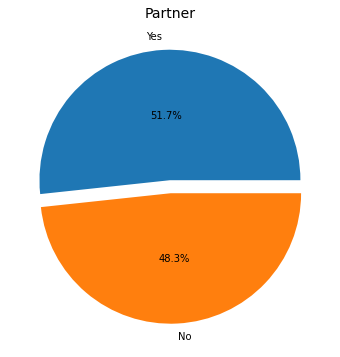

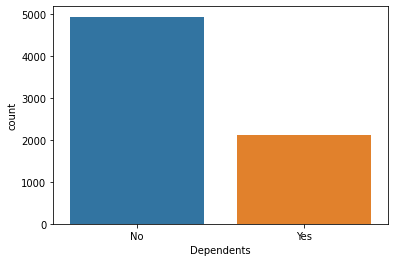

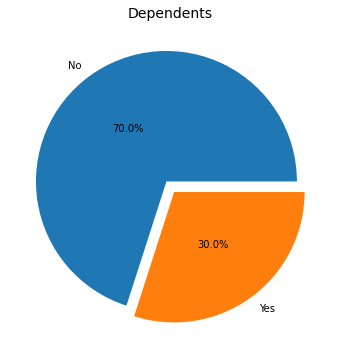

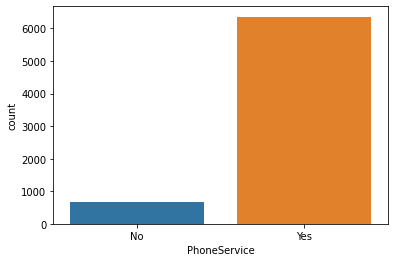

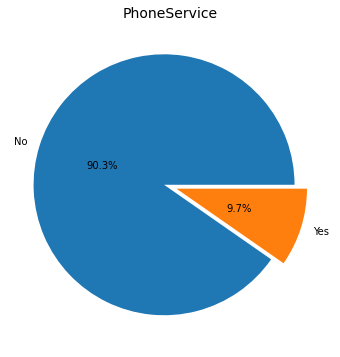

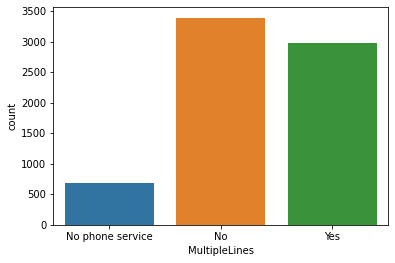

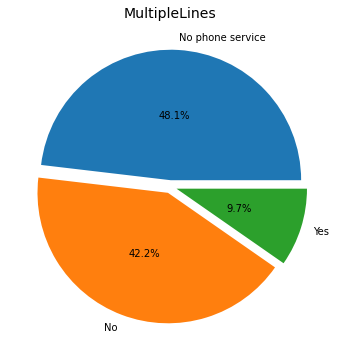

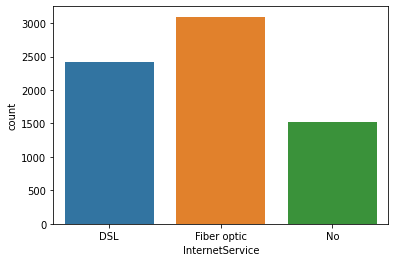

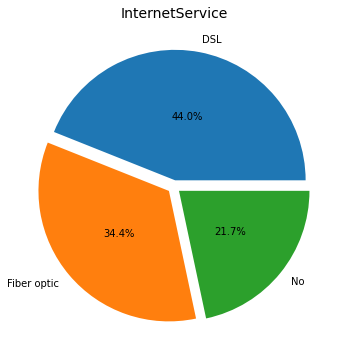

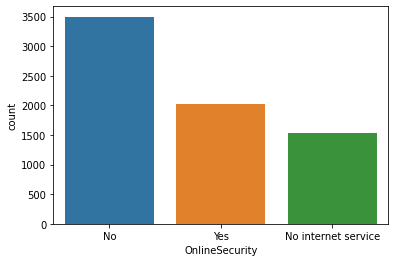

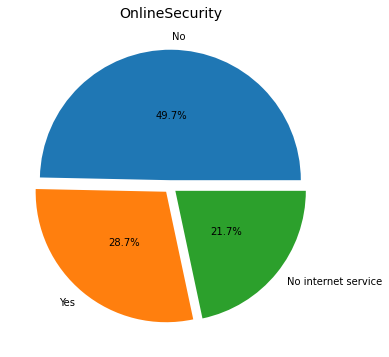

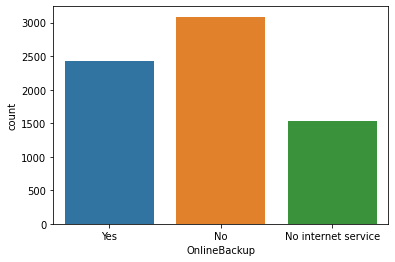

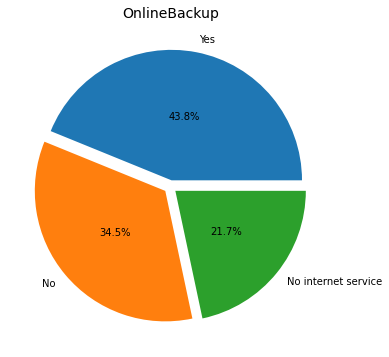

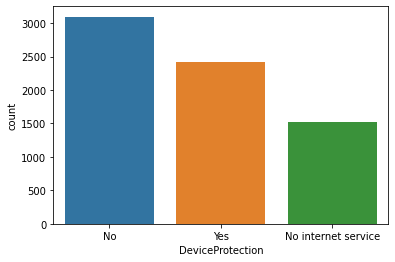

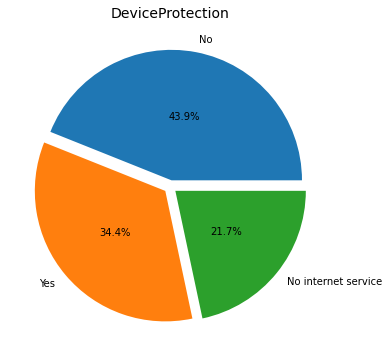

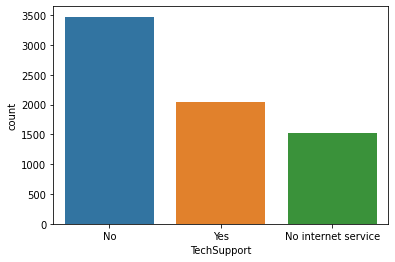

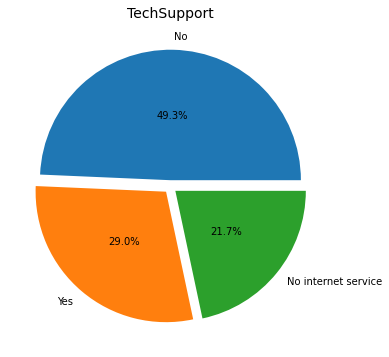

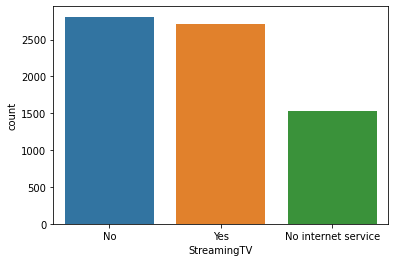

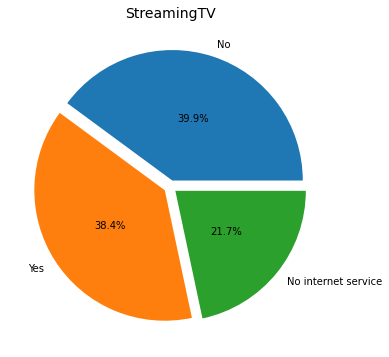

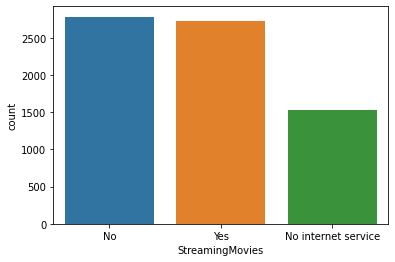

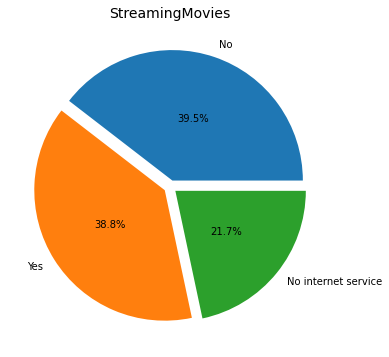

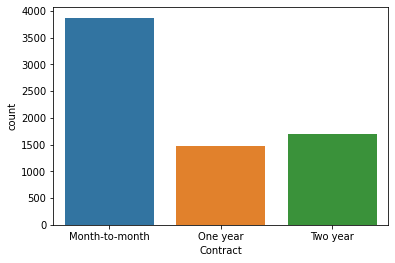

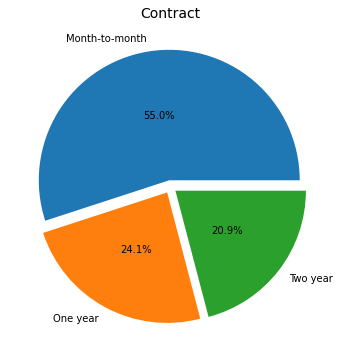

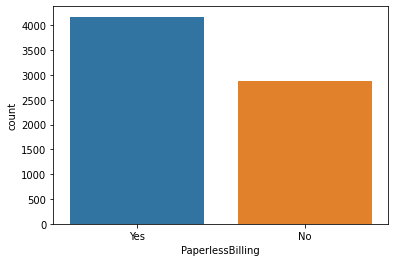

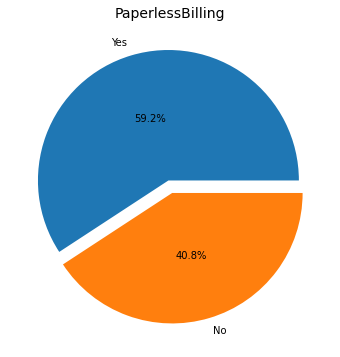

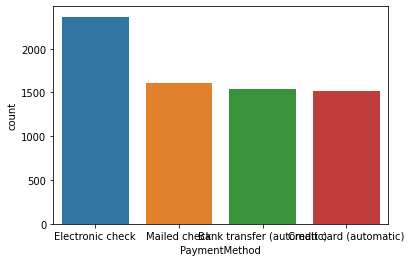

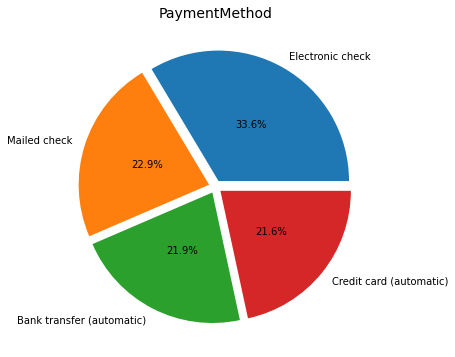

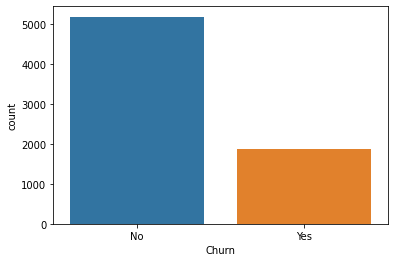

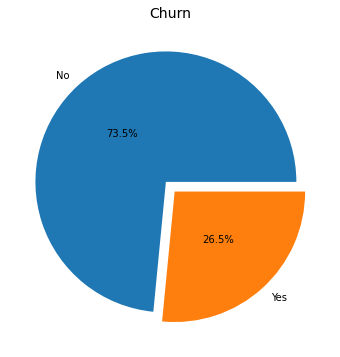

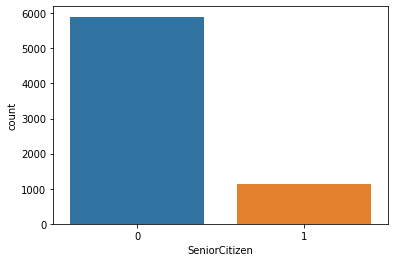

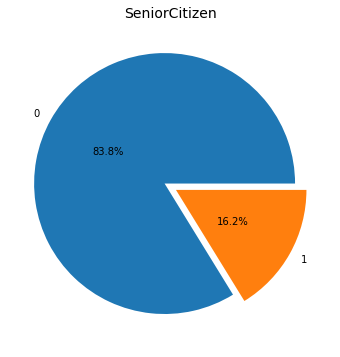

In [ ]:
for i in list_obj:
  sns.countplot(x=churn[i], data=churn)
  counts= churn[i].value_counts()
  p=counts/len(churn[i])
  pie, ax = plt.subplots(figsize=[10,6])
  labels=  churn[i].unique()
  explode =  churn[i].nunique()
  plt.pie(x=p ,autopct="%.1f%%", pctdistance=0.5, labels=labels , explode = [0.05]*explode)
  plt.title(i, fontsize=14)

  plt.show()

1. We can see an equal no. of male and female in the data.
2. We can see almost equal no. of people having partners and 
not having parteners.<br>
3. We can see almost 70% people do not have Dependents.<br>
4. We can see almost 90% people do have phone service. However it seems 'PhoneService'
has 90% same type of data. so we can drop it.<br>
5. We can see 48% people do not any servie. And 9.7% people do not have any phone service.
6. We can see 44% people have Fibre optic and 34% DSL ,21.7% people do not have any internet service.<br>
7. We can see 50% people do not have online security. 


In [ ]:
list_num = churn.select_dtypes(include=np.number).columns.tolist()
list_num

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
list_num.remove('SeniorCitizen')

In [ ]:

from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

Mean: 32.37114865824223
Median: 29.0
Skewness: 0.2394887299846216


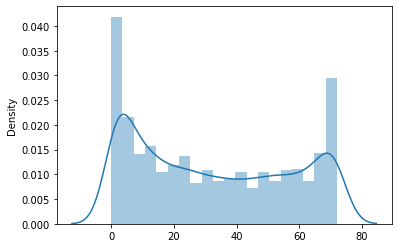

Mean: 64.76169246059922
Median: 70.35
Skewness: -0.2204774644391769


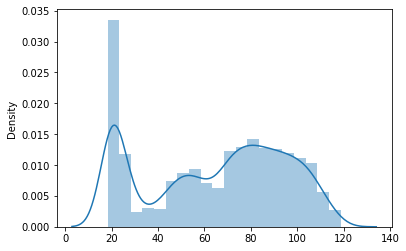

Mean: 2281.9169281556187
Median: 1397.475
Skewness: 0.9635838161778828


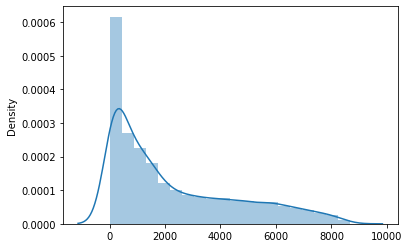

In [ ]:
for i in list_num:
  print('Mean:', churn[i].mean())
  print('Median:', churn[i].median())
  print('Skewness:', skew(churn[i]))
  sns.distplot(x= churn[i], bins = 20, hist=True, kde=True)
  plt.show()

tenure


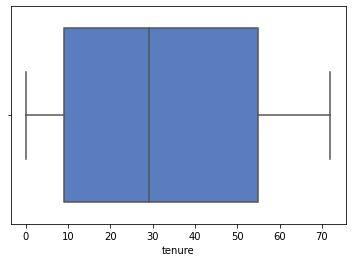

MonthlyCharges


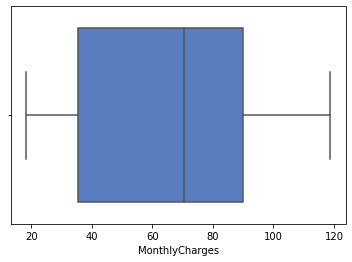

TotalCharges


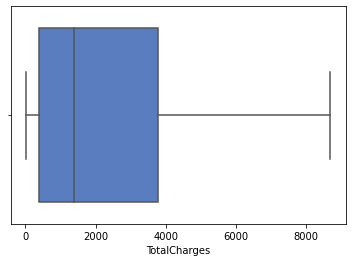

In [ ]:
for i in list_num:
  print(i)
  sns.boxplot(x=churn[i], data = churn, palette= 'muted')
  plt.show()



Bivariate Analysis

gender


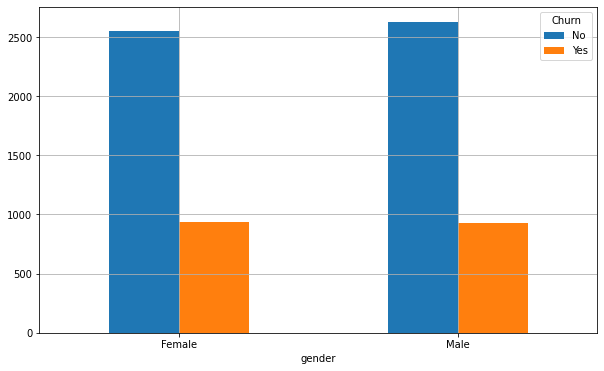

Partner


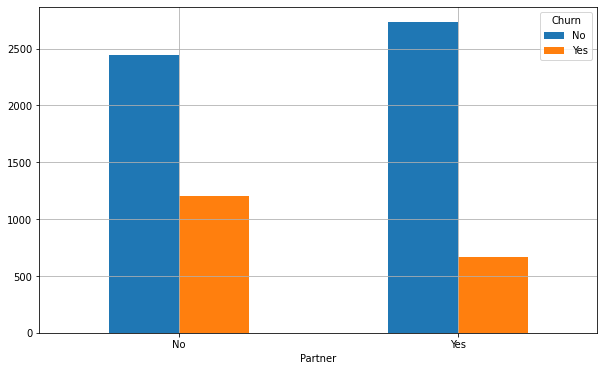

Dependents


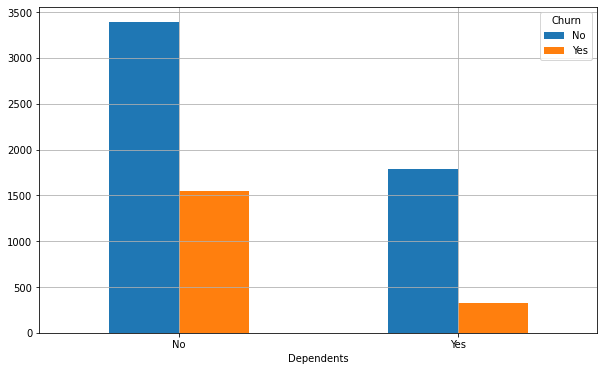

PhoneService


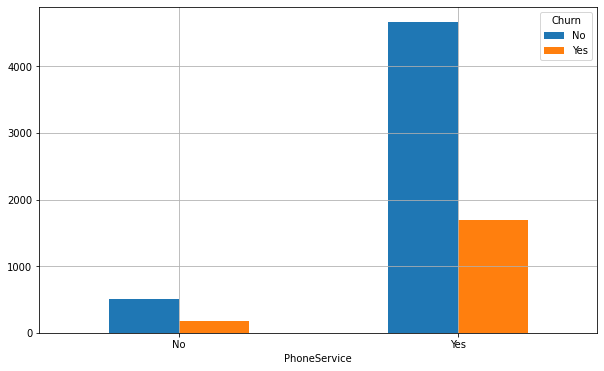

MultipleLines


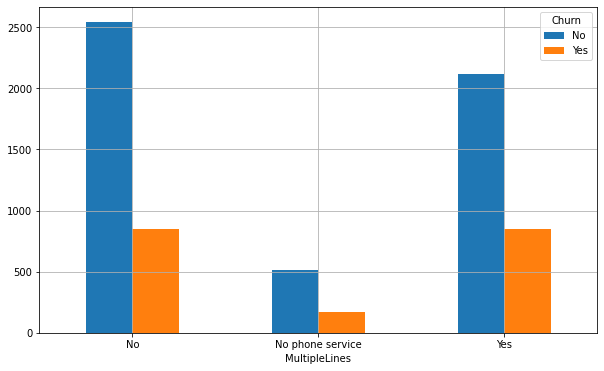

InternetService


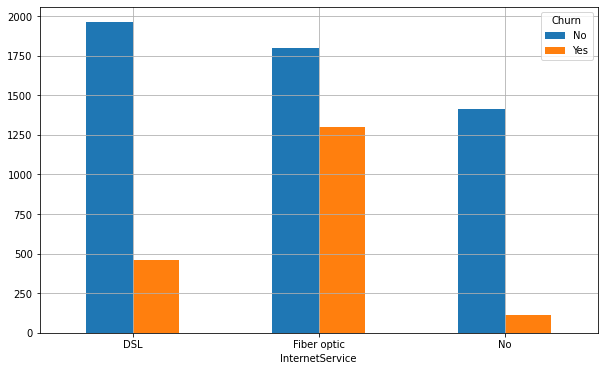

OnlineSecurity


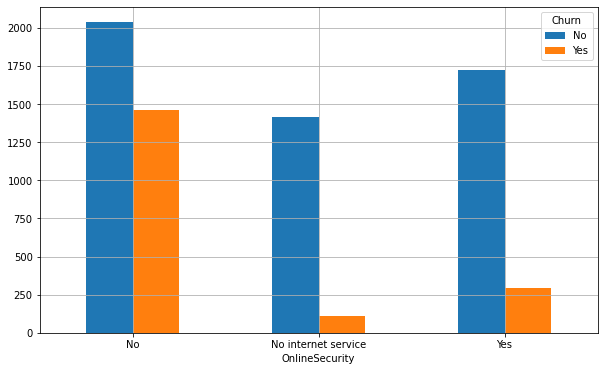

OnlineBackup


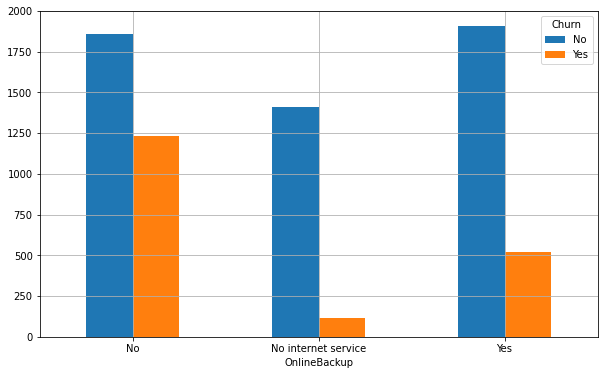

DeviceProtection


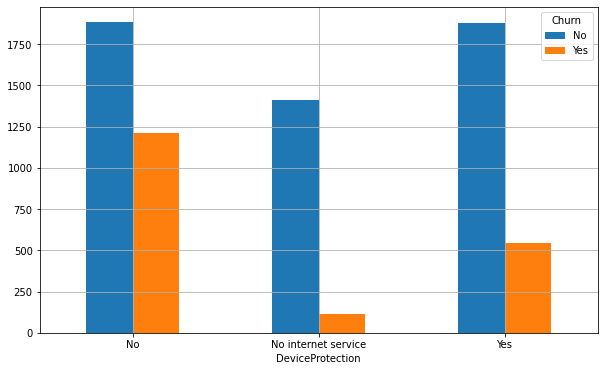

TechSupport


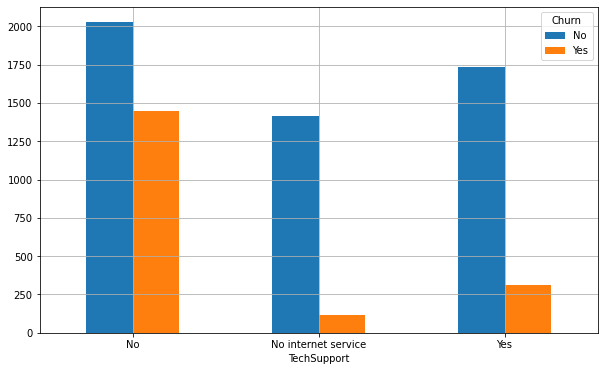

StreamingTV


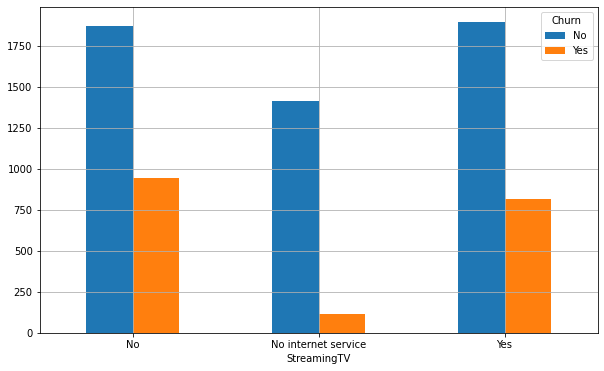

StreamingMovies


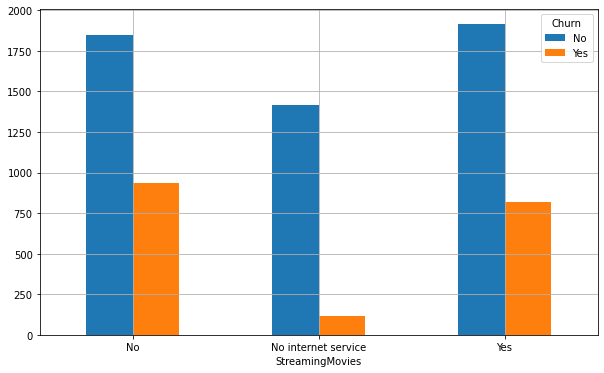

Contract


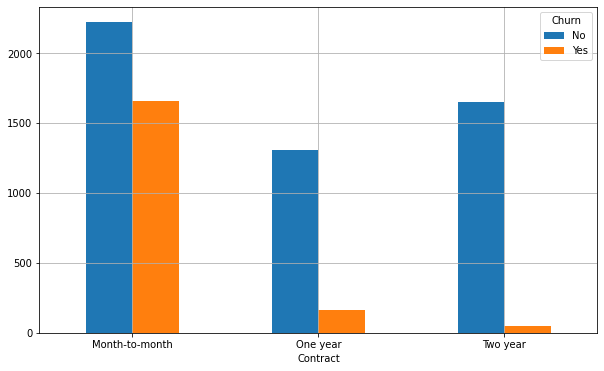

PaperlessBilling


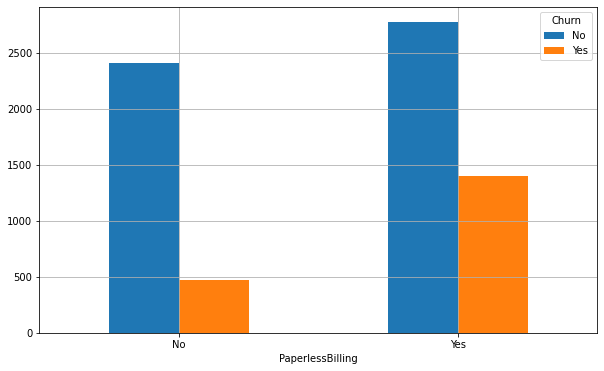

PaymentMethod


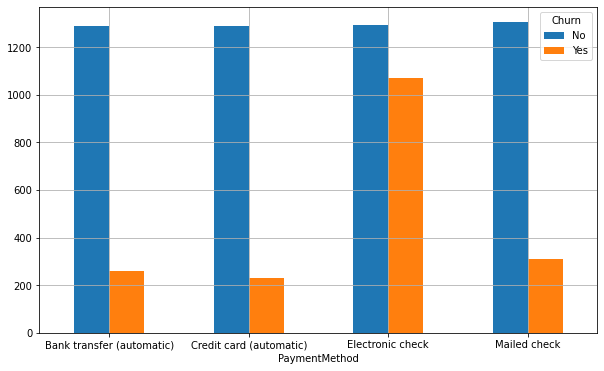

Churn


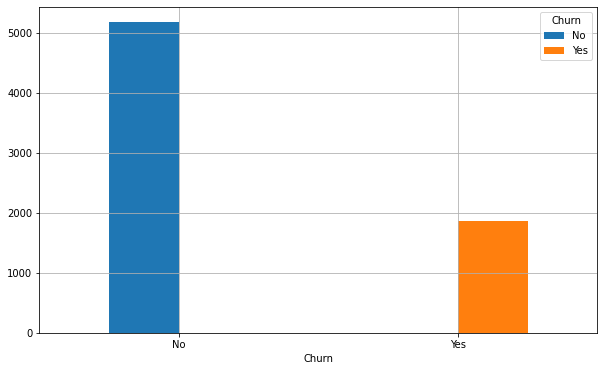

SeniorCitizen


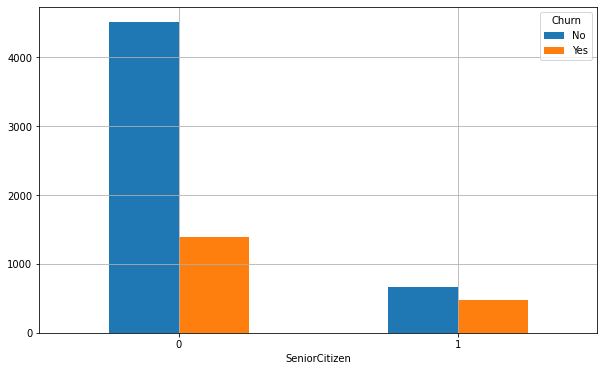

In [ ]:


for i in list_obj:
  print(i)
  pd.crosstab(churn[i], churn['Churn']).plot(kind='bar', stacked=False, grid=True,rot=0, figsize = (10,6))
                                                                                  
  
  plt.show()

In [ ]:
pd.crosstab(churn['OnlineSecurity'],churn['Churn'])

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


In [ ]:
pd.crosstab(churn['OnlineBackup'], churn['Churn'])

Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


In [ ]:
pd.crosstab(churn['DeviceProtection'], churn['Churn'])

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


In [ ]:
pd.crosstab(churn['TechSupport'], churn['Churn'])

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [ ]:
pd.crosstab(churn['StreamingMovies'], churn['Churn'])

Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


In [ ]:
pd.crosstab(churn['StreamingTV'], churn['Churn'])

Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


Here we can see all the above columns have almost similar values. and showing similar trend. 

In [ ]:
churn['T_C']= churn['TotalCharges']**0.5

In [ ]:
skew(churn['T_C'])

0.30977234939172416

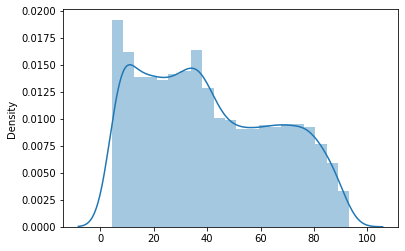

In [ ]:
sns.distplot(x=churn['T_C'], hist=True)

Here we have transformed the 'Total Charges' columns. now we can see it is in better distribution than before.

In [ ]:
churn.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,T_C
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,5.463515
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,43.468379
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,10.399519
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,42.903963
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,12.314625
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,28.644371
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,44.152010
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,17.375270
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,55.191032
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,59.058869


In [ ]:
churn.drop(columns=['TotalCharges', 'StreamingMovies','TechSupport', 'DeviceProtection' ],axis = 1, inplace= True)

We have dropped the Total charges and replaced it with T_C column. And also dropped 'StreamMovies', 'TechSupport', 'DeviceProtection' as they are 90% similar with 'StreamTV', 'OnlineSecurity', 'OnlineBackup' respectively. so removed one of them and kept one.

In [ ]:
dict = {'Yes':1, 'No':0}

In [ ]:
churn['Churn']= churn['Churn'].map(dict)

Label the target column.

In [ ]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,T_C
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,Month-to-month,Yes,Electronic check,29.85,0,5.463515
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,No,One year,No,Mailed check,56.95,0,43.468379
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,Month-to-month,Yes,Mailed check,53.85,1,10.399519
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,42.903963
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,12.314625


In [ ]:
churn1 = pd.get_dummies(churn, drop_first=True)

created the dummy variables for all categorical variable.

In [ ]:
churn1.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,T_C,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,5.463515,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,34,56.95,0,43.468379,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,10.399519,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,0,45,42.30,0,42.903963,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,12.314625,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
X = churn1.loc[:, churn1.columns != 'Churn']
y = churn1["Churn"]


Separate the X and Y.

In [ ]:
churn1.shape

(7043, 25)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,test_size=0.2 )

Perform the train_test_split.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5634, 24)
(1409, 24)


# Import the Required Libraries, packages and models.

In [ ]:
import keras #specifically used for NN
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import os

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaled the X_train and X_test

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=24, kernel_initializer='normal', activation='relu')) #1st hidden layer
model.add(Dense(8, activation = 'relu')) #2nd hidden layer
#model.add(Dense(8, activation = 'relu')) #3rd hidden layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #output layer

Imported the model Sequential.<br>
Added 3 layers. 2 Hidden Layers and 1 output layer. <br>
Initially added 4 layers, however it increased the validation loss so removed that layer and got better accuracy and least validation loss.

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


Here is the summary of the model.

We have taken the 'Binary_crossentropy' as our loss function.<br>
Optimizer - 'adam', so that it will adapt the learning rate itself.<br>


In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
his = model.fit(x = X_train_scaled, y = y_train, batch_size = 500, epochs = 100,verbose = 1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
12/12 [==============================] - 1s 28ms/step - loss: 0.3940 - accuracy: 0.8142 - val_loss: 0.4441 - val_accuracy: 0.7906
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8187 - val_loss: 0.4439 - val_accuracy: 0.7892
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8212 - val_loss: 0.4437 - val_accuracy: 0.7885
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8138 - val_loss: 0.4427 - val_accuracy: 0.7878
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.8157 - val_loss: 0.4436 - val_accuracy: 0.7857
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3935 - accuracy: 0.8144 - val_loss: 0.4442 - val_accuracy: 0.7892
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3961 - accuracy: 0.8114 - val_loss: 0.4444 - val_accuracy: 0.7878
Epoch 8/100


In [ ]:
his.history

It gives the array of validation loss and Validation accuracy.


In [ ]:
%pylab inline
def show_plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train','test'])
    plt.title('Train vs Test Accuracy')
    plt.xlabel('No. of Epochs')
    plt.show()
    print()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train','test'])
    plt.title('Train vs Test Loss')
    plt.xlabel('No. of Epochs')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


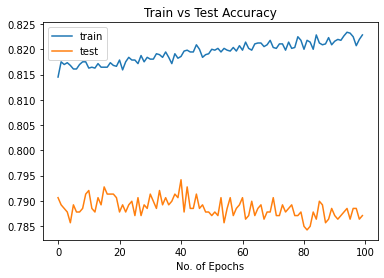

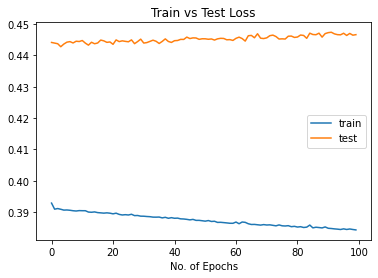

In [ ]:
show_plots(his)

In [ ]:
print('Minimum Validation loss:', np.min(his.history['val_loss']))
print('Best Epoch with min val loss:', np.argmin(his.history['val_loss'])+1)

Minimum Validation loss: 0.4427398443222046
Best Epoch with min val loss: 4


Now got the model where the validation loss is least.
And the epoch number is 4.

# **Model 2 with Early Stopping and some more functions.**

In [ ]:
from keras.layers import Dropout, LeakyReLU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers 

In [ ]:
model1 = Sequential()
model1.add(Dense(16, input_dim=24, kernel_initializer='normal', kernel_regularizer= regularizers.l2(0.001)))
model1.add(LeakyReLU())
model1.add(Dropout(0.1))

model1.add(Dense(16, kernel_regularizer=regularizers.l1(0.1)))
model1.add(LeakyReLU())

model1.add(Dropout(0.1))

#model1.add(Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
#model1.add(LeakyReLU())

model1.add(Dense(1, kernel_initializer='normal', activation = 'sigmoid'))

**Here we have added Dropout and early Stopping.**

In [ ]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 16)                400       
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 16)                272       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)               

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Here we have used 'rmsprop' optimizer.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta= 0.0001, patience=3, verbose=1, mode='min')

In [ ]:
hist = model1.fit(x=X_train_scaled, y=y_train, batch_size=500, epochs=100, verbose=1, callbacks = early_stopping, validation_data= (X_test,y_test) )

Epoch 1/100
12/12 [==============================] - 2s 66ms/step - loss: 6.2845 - accuracy: 0.6339 - val_loss: 5.8531 - val_accuracy: 0.7580
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 5.8559 - accuracy: 0.7541 - val_loss: 5.4956 - val_accuracy: 0.7388
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 5.5379 - accuracy: 0.7719 - val_loss: 5.2783 - val_accuracy: 0.7388
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 5.2416 - accuracy: 0.7612 - val_loss: 5.1440 - val_accuracy: 0.7388
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 4.9562 - accuracy: 0.7627 - val_loss: 5.0687 - val_accuracy: 0.7388
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 4.6796 - accuracy: 0.7589 - val_loss: 5.0039 - val_accuracy: 0.7388
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 4.4143 - accuracy: 0.7616 - val_loss: 4.9339 - val_accuracy: 0.7388
Epoch 8/100


It stopped at the point where it noticed an increment in validation loss.
We can see the least validation loss is 0.60 on epoch 38. And the accuracy is 77%. 